In [20]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('churns_telecom.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
print(df.shape)

(3333, 21)


In [4]:
print(df.columns)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [6]:
df['churn']= df['churn'].astype('int64')

In [7]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,0


In [8]:
#STATISTICS OF THE DATASET

df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [9]:
df['churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

In [10]:
df.sort_values(by=['total day minutes', 'churn'],
               ascending=[False, True]).head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
365,CO,154,415,343-5709,no,no,0,350.8,75,59.64,...,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,348-1163,yes,no,0,345.3,81,58.70,...,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,373-2053,no,no,0,335.5,77,57.04,...,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


In [11]:
print(df['churn'].mean())

print(df[df['churn']== 1].mean())

0.14491449144914492
account length            102.664596
area code                 437.817805
number vmail messages       5.115942
total day minutes         206.914079
total day calls           101.335404
total day charge           35.175921
total eve minutes         212.410145
total eve calls           100.561077
total eve charge           18.054969
total night minutes       205.231677
total night calls         100.399586
total night charge          9.235528
total intl minutes         10.700000
total intl calls            4.163561
total intl charge           2.889545
customer service calls      2.229814
churn                       1.000000
dtype: float64


In [12]:
# time on average churned users spend on phone during a day

print(df[df['churn'] == 1]['total day minutes'].mean())
print(df[df['churn'] == 1]['total night minutes'].mean())
print(df[df['churn'] == 1]['total intl minutes'].mean())


206.91407867494814
205.2316770186334
10.699999999999996


In [13]:

columns_to_show = ['total day minutes', 'total eve minutes', 
                   'total night minutes']

df.groupby(['churn'])[columns_to_show].agg([np.mean, np.std, np.min, 
                                            np.max])



total day minutes                        total eve minutes             \
                   mean        std amin   amax              mean        std   
churn                                                                         
0            175.175754  50.181655  0.0  315.6        199.043298  50.292175   
1            206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   total night minutes                          
       amin   amax                mean        std  amin   amax  
churn                                                           
0       0.0  361.8          200.133193  51.105032  23.2  395.0  
1      70.9  363.7          205.231677  47.132825  47.4  354.9

In [14]:
pd.crosstab(df['churn'], df['voice mail plan'], normalize = True)

voice mail plan,no,yes
churn,,
0,0.602460,0.252625
1,0.120912,0.024002


In [16]:
#USE OF PIVOT TABLES . Avg number of calls during day,eve,night by area codes.

df.pivot_table(['total day calls', 'total eve calls','total night calls'],['area code'],aggfunc='mean')

,total day calls,total eve calls,total night calls
area code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190


In [17]:
total_calls = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']
df.insert(loc = len(df.columns), column='total calls', value=total_calls) 

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total calls
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


In [18]:
total_charge = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']
df.insert(loc = len(df.columns), column='total charge', value=total_charge) 

df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total calls,total charge
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,279.1,83,12.56,9.9,6,2.67,2,0,292,60.10
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,191.3,123,8.61,9.6,4,2.59,3,0,239,63.53
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,191.9,91,8.64,14.1,6,3.81,2,0,264,67.74
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,139.2,137,6.26,5.0,10,1.35,2,0,336,57.53
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,241.4,77,10.86,13.7,4,3.70,0,0,276,77.01


In [19]:
pd.crosstab(df['churn'],df['international plan'],margins=True)

international plan,no,yes,All
churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


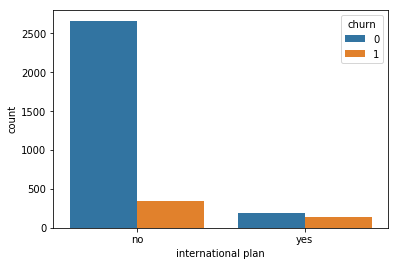

In [21]:

sns.countplot(x='international plan', hue='churn',data=df)

In [23]:

df['many_service_calls'] = (df['customer service calls'] > 3).astype('int')

pd.crosstab(df['many_service_calls'], df['churn'], margins=True)

churn,0,1,All
many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


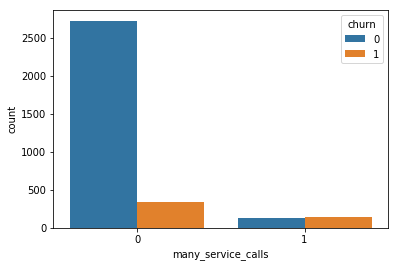

In [24]:
sns.countplot(x='many_service_calls', hue='churn',data=df)

In [25]:
pd.crosstab(df['many_service_calls'] & df['international plan'] , df['churn'])

churn,0,1
row_0,,
False,2721,345
True,129,138


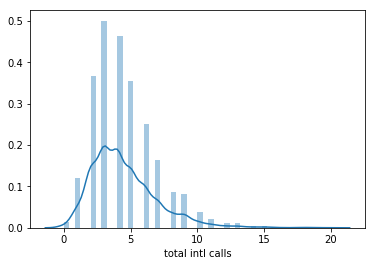

In [26]:
sns.distplot(df['total intl calls'])

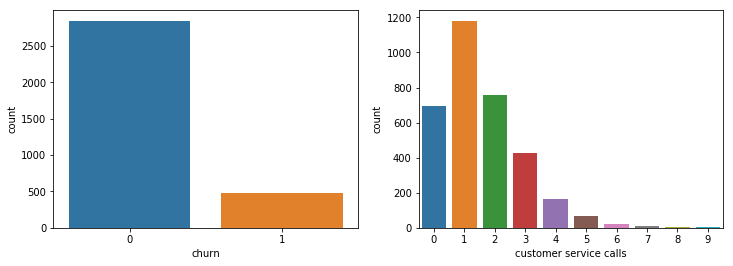

In [27]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='churn', data=df, ax=axes[0]);
sns.countplot(x='customer service calls', data=df, ax=axes[1]);

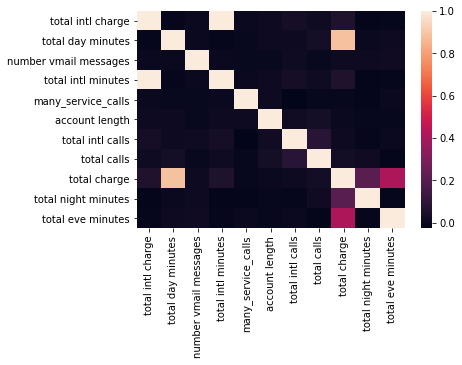

In [29]:
numerical = list(set(df.columns) - 
                 set(['state', 'international plan', 'voice mail plan', 
                      'area code', 'churn', 'customer service calls','total eve calls','total day calls',
                      'total night calls','total day charge','total eve charge','total night charge']))

corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

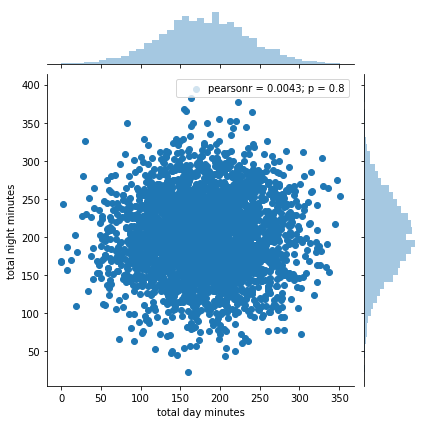

In [30]:
sns.jointplot(x='total day minutes', y= 'total night minutes',data=df, kind='scatter')

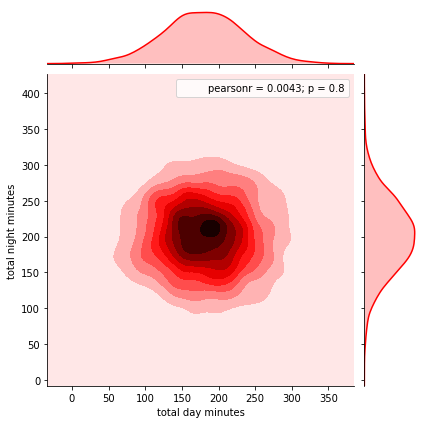

In [31]:
sns.jointplot('total day minutes',  'total night minutes',data=df, kind='kde',color='r')

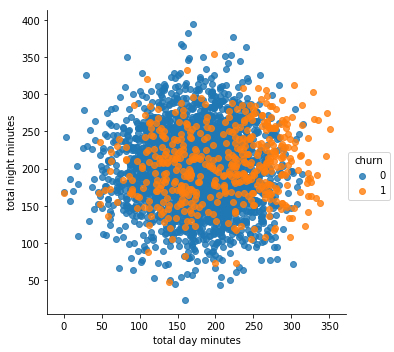

In [32]:
sns.lmplot('total day minutes', 'total night minutes', data=df, hue='churn', fit_reg=False);

In [34]:

df.groupby(['state'])['churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

state,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


In [35]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [39]:
X = df.drop(['churn', 'state','phone number'], axis=1)
X['international plan'] = X['international plan'].map({'yes': 1, 'no': 0})
X['voice mail plan'] = X['voice mail plan'].map({'yes': 1, 'no': 0})

In [40]:
X.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,total calls,total charge,many_service_calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,244.7,91,11.01,10.0,3,2.70,1,303,75.56,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,332,59.24,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,333,62.29,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,255,66.80,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,186.9,121,8.41,10.1,3,2.73,3,359,52.09,0


In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)


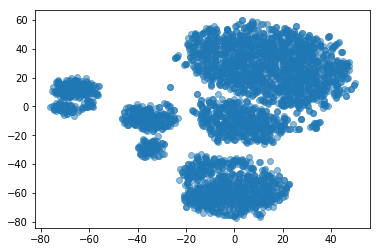

In [43]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);

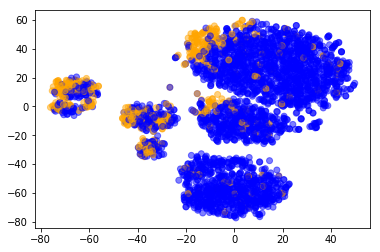

In [44]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=df['churn'].map({False: 'blue', True: 'orange'}), alpha=.5);

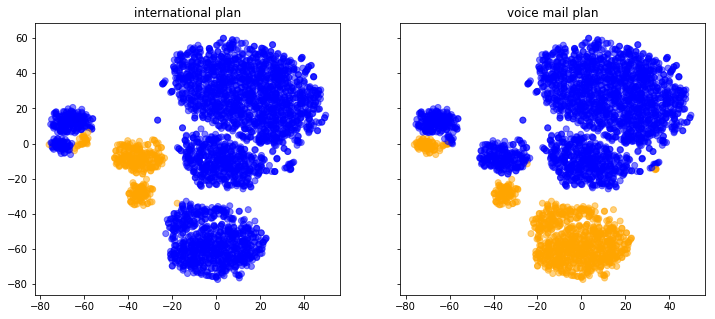

In [46]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['international plan', 'voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=df[name].map({'yes': 'orange', 'no': 'blue'}), alpha=.5);
    axes[i].set_title(name)